In [4]:
import sys
sys.path.append('/home/wangs/rs/lib')
import ff
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from multiprocessing import Pool
from tqdm import tqdm
import statsmodels.api as sm
from datetime import datetime
import mplfinance as mpf
from functools import partial
import matplotlib as mpl

**名称**：UID_RC\
**来源**：20231108-东吴证券-“波动率选股因子”系列研究（二）：信息分布均匀度，基于高频波动率的选股因子\
**构造方法：**\
股价波动率大小的变化幅度，用来衡量信息冲击的剧烈程度。\
1.利用分钟数据，计算日内分钟涨跌幅的标准差记为每日高频波动率。 data_float_all\
2.计算过去20个交易日的每支股票高频波动率的标准差与平均值。 Vol_daily_std、Vol_daily_mean\
3.二者相除(并做市值中性化处理)得到信息分布均匀度UID因子 UID

In [21]:
UID = ff.read('UID_RC').T

long normal
持仓模式： 普通模式
持仓周期： 20
仓位数：   100
排序:      正序
回测部分：
回测仓位数： 100
回测手续费： 0
交易模式： t日收盘价买入，收盘价卖出


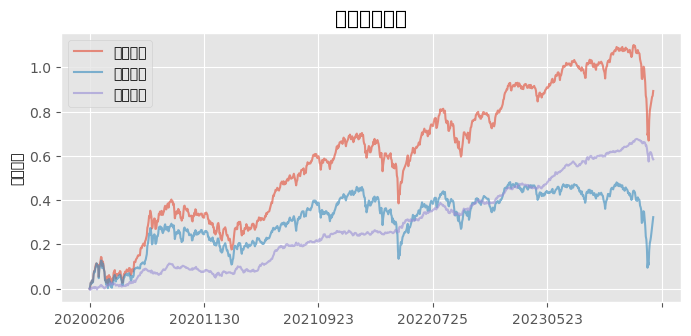

,指数收益,超额收益,策略收益
年化收益率,0.082,0.148,0.226
年化波动率,0.210,0.069,0.237
夏普率,0.390,2.144,0.957
最大回撤,-0.387,-0.102,-0.432
收益回撤比,0.212,1.449,0.525
胜率,0.531,0.549,0.570
盈亏比,0.942,1.188,0.891


(        指数收益   超额收益   策略收益
 年化收益率  0.082  0.148  0.226
 年化波动率  0.210  0.069  0.237
 夏普率    0.390  2.144  0.957
 最大回撤  -0.387 -0.102 -0.432
 收益回撤比  0.212  1.449  0.525
 胜率     0.531  0.549  0.570
 盈亏比    0.942  1.188  0.891,
                 策略     index          策略收益      指数收益      超额收益
 20200206  1.000000  1.000000  6.661338e-16  0.000000  0.000000
 20200207  1.005260  1.011439  5.245977e-03  0.011374 -0.006198
 20200210  1.027197  1.027101  2.683343e-02  0.026740  0.000119
 20200211  1.024499  1.021528  2.420359e-02  0.021300  0.002915
 20200212  1.037722  1.037904  3.702779e-02  0.037203 -0.000215
 ...            ...       ...           ...       ...       ...
 20240221  2.303156  1.262986  8.342804e-01  0.233479  0.615681
 20240222  2.340270  1.291619  8.502664e-01  0.255896  0.609103
 20240223  2.379058  1.326178  8.667047e-01  0.282301  0.598868
 20240226  2.389792  1.345360  8.712062e-01  0.296662  0.588866
 20240227  2.442960  1.381545  8.932104e-01  0.323202  0.584207
 
 [986

In [22]:
UID_small = ((UID < UID.quantile(0.1)) * UID).T
UID_large = ((UID > UID.quantile(0.9)) * UID).T
ff.run((-UID_small *  ff.filter0.loc[UID.T.index,UID.T.columns]).loc[:,:'20240227'], positions = 100, period = 20, fees = 0) 